# Model Validation

## Loading DataSets and Dependencies

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')

#Training Data
train = pd.read_csv('Processed_DataSets/Final_Train.csv',encoding='ISO-8859-1',low_memory=False,index_col=0)
train.index = train['ticket_id']
train.drop(['ticket_id'],axis=1,inplace=True)

#Validation Data
val = pd.read_csv('Processed_DataSets/Final_Validation_DataSet.csv',encoding='ISO-8859-1',low_memory=False,index_col=0)

### Normalizing the Sequence of Features in the DataSets

In [2]:
#Handling Missing Feature Values

missing_cols = set(train.columns) - set(val.columns)
for c in missing_cols:
    val[c] = 0  

missing_cols = set(val.columns) - set(train.columns)
for c in missing_cols:
    train[c] = 0 

### Building the Selected Model

In [3]:
X_train = train.drop('compliance',axis=1)
y_train = train.compliance

from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(C=100,class_weight={0:0.3,1:0.7},max_iter=1000).fit(X_train,y_train)

## Validation by Using the Selected Metric of AU-ROC Curve

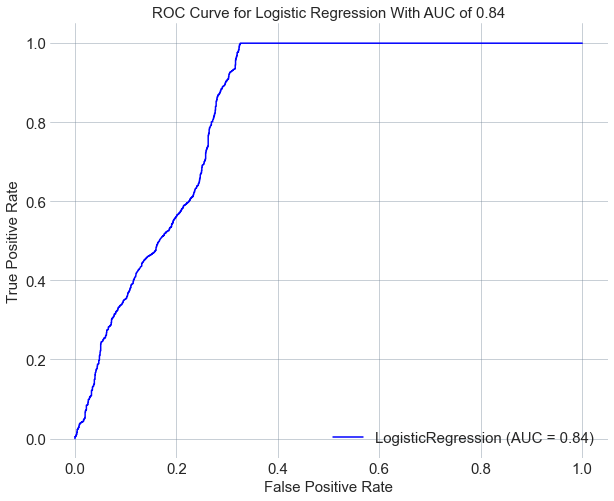

In [5]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

X_test = val.drop('compliance',axis=1)
y_test = val.compliance

#Probability Scores
y_score = lgr.predict_proba(X_test)

#Setting The Canvas
import pylab as plot
plt.figure(figsize=(10,8))
ax=plt.gca()
params = {'axes.labelsize': 15,
         'axes.titlesize':15,
         'xtick.labelsize':15,
         'ytick.labelsize':15}
plot.rcParams.update(params)
plt.style.use('seaborn-white')

#Plotting ROC Curve
plot_roc_curve(lgr, X_test, y_test,ax=ax,color='b');
plt.title('ROC Curve for Logistic Regression With AUC of {:.2f}'.format(roc_auc_score(y_test,y_score[:,1])));
plt.legend(frameon=False,loc=4,fontsize=15);
plt.grid(which='both',color='lightslategrey',alpha=0.5)
for sp in plt.gca().spines.values():
    sp.set_visible(False)
plt.savefig('Visualizations/Validation.png')